In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv ("/content/drive/MyDrive/holistic_health_lifestyle_dataset.csv")

In [3]:
data

,Physical_Activity,Nutrition_Score,Stress_Level,Mindfulness,Sleep_Hours,Hydration,BMI,Alcohol,Smoking,Overall_Health_Score,Health_Status
0,54.93,5.64,5.70,0.00,6.29,2.58,24.28,4.28,8.98,36.95,Poor
1,42.23,6.39,5.57,4.45,8.52,2.45,25.97,7.46,3.22,55.17,Average
2,57.95,5.81,3.13,9.13,6.70,3.26,25.19,0.00,4.60,78.30,Good
3,75.46,7.22,6.16,16.50,7.14,3.73,19.53,9.96,3.95,94.02,Good
4,40.32,9.39,2.02,25.24,8.08,3.05,23.35,4.32,8.08,100.00,Good
...,...,...,...,...,...,...,...,...,...,...,...
9995,71.02,7.78,3.85,26.20,7.09,1.94,22.42,6.76,15.93,94.19,Good
9996,5.03,9.75,7.89,17.65,6.96,1.62,25.71,1.28,0.98,90.45,Good
9997,30.89,7.76,4.00,21.17,7.75,2.61,25.29,1.12,3.22,100.00,Good
9998,54.92,10.00,1.22,23.15,7.40,0.75,25.85,2.99,6.56,100.00,Good


In [4]:
print(data.shape)
print(data.columns)

(10000, 11)
Index(['Physical_Activity', 'Nutrition_Score', 'Stress_Level', 'Mindfulness',
       'Sleep_Hours', 'Hydration', 'BMI', 'Alcohol', 'Smoking',
       'Overall_Health_Score', 'Health_Status'],
      dtype='object')


In [5]:
# Missing Values

print("ตรวจสอบค่าว่างในแต่ละคอลัมน์ :\n" , data.isnull().sum())

ตรวจสอบค่าว่างในแต่ละคอลัมน์ :
 Physical_Activity       0
Nutrition_Score         0
Stress_Level            0
Mindfulness             0
Sleep_Hours             0
Hydration               0
BMI                     0
Alcohol                 0
Smoking                 0
Overall_Health_Score    0
Health_Status           0
dtype: int64


In [6]:
# Encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Health_Status"] = le.fit_transform(data["Health_Status"])

In [7]:
X = data[["Physical_Activity","Nutrition_Score","Stress_Level","Mindfulness","Sleep_Hours","Hydration","BMI","Smoking"]]
y = data["Health_Status"]

In [8]:
# การกระจายตัว

import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-310449771.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Health_Status", order=order, palette='coolwarm')


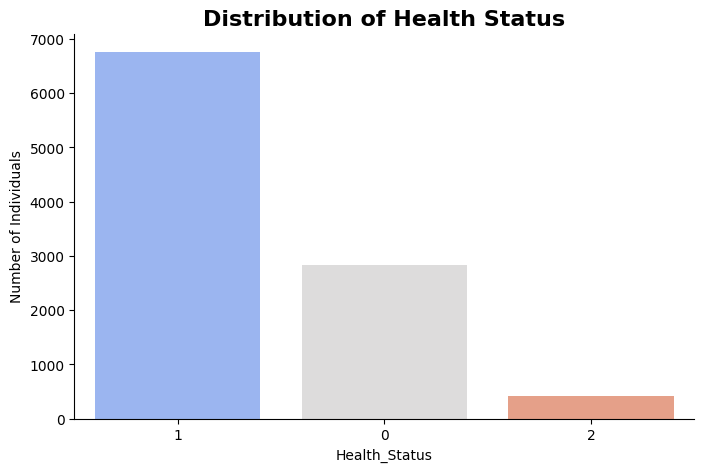

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x="Health_Status", order=order, palette='coolwarm')

plt.title("Distribution of Health Status", fontsize=16, fontweight='bold')
plt.xlabel("Health_Status")
plt.ylabel("Number of Individuals")

sns.despine()
plt.show()

In [12]:
# train test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42 # test 30% , train 70%
)

In [13]:
# imbalanced
from sklearn.datasets import make_classification
from collections import Counter #นำเข้าเพื่อทำการนับข้อมูลที่เกิด imbalanced
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [14]:
print("สัดส่วน Class ในชุดฝึกก่อน SMOTE:", Counter(y_train))

สัดส่วน Class ในชุดฝึกก่อน SMOTE: Counter({1: 4707, 0: 1998, 2: 295})


In [15]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [16]:
print("สัดส่วน Class ในชุดฝึกหลัง SMOTE:", Counter(y_resampled))

สัดส่วน Class ในชุดฝึกหลัง SMOTE: Counter({1: 4707, 0: 4707, 2: 4707})


# Random Forest

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
rf = RandomForestClassifier(n_estimators=200, random_state=42) # Train Random Forest
rf.fit(X_resampled, y_resampled)

RandomForestClassifier(n_estimators=200, random_state=42)

In [19]:
feature_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_imp

,0
Mindfulness,0.359084
Nutrition_Score,0.169073
Smoking,0.139973
Sleep_Hours,0.076498
Physical_Activity,0.075634
BMI,0.061919
Hydration,0.059673
Stress_Level,0.058146


In [20]:
importances = rf.feature_importances_ # Features importance values
features = X.columns

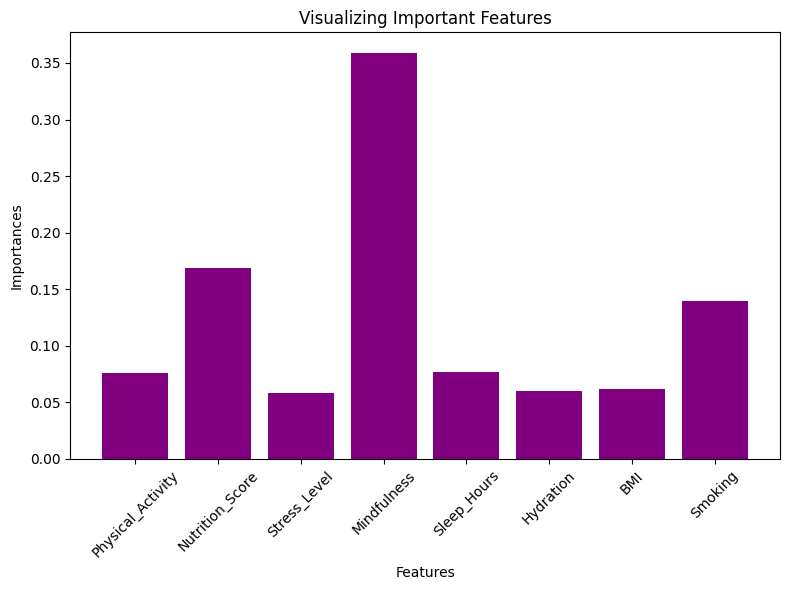

In [21]:
plt.figure(figsize=(8,6))
plt.bar(features, importances, color='purple')
plt.xlabel('Features')
plt.ylabel('Importances')
plt.title('Visualizing Important Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
y_pred = rf.predict(X_test)

In [23]:
accuracy = accuracy_score(y_test, y_pred)
# ผลการประเมินโมเดล Random Forest Classifier
print(f"ความแม่นยำ (Accuracy): {accuracy:.2%}")

# รายงานการจำแนกประเภท (Classification Report)
print("\nรายงานผลการจำแนกประเภท (Classification Report):")
print(classification_report(y_test, y_pred, target_names=le.classes_))

ความแม่นยำ (Accuracy): 88.50%

รายงานผลการจำแนกประเภท (Classification Report):
              precision    recall  f1-score   support

     Average       0.76      0.85      0.80       825
        Good       0.95      0.92      0.93      2052
        Poor       0.69      0.61      0.65       123

    accuracy                           0.89      3000
   macro avg       0.80      0.79      0.80      3000
weighted avg       0.89      0.89      0.89      3000



In [24]:
print("=== Random Forest Performance ===")
print("Confusion Matrix :")
print(confusion_matrix(y_test, y_pred))

=== Random Forest Performance ===
Confusion Matrix :
[[ 698   94   33]
 [ 170 1882    0]
 [  48    0   75]]


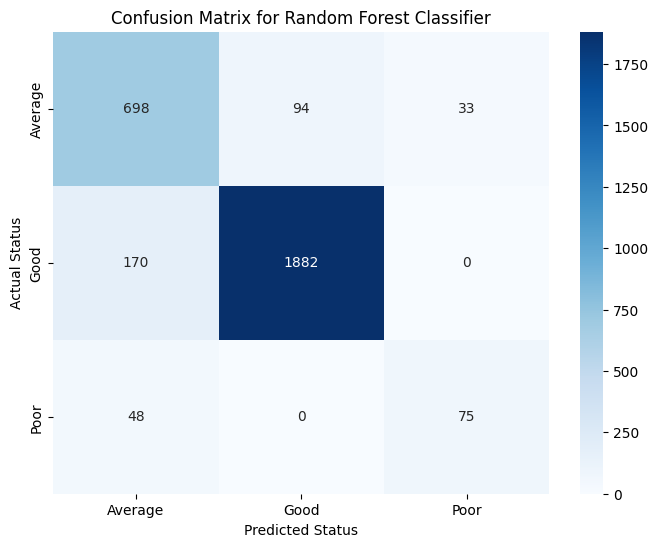

In [25]:
# --- Performance Measure ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=le.classes_,
    yticklabels=le.classes_,
)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.ylabel('Actual Status')
plt.xlabel('Predicted Status')
plt.show()

# XGB

In [26]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [27]:
xgb_optimal = XGBClassifier(
    n_estimators=300,        # ใช้ค่า Tuned
    learning_rate=0.05,      # ใช้ค่า Tuned
    max_depth=5,             # ใช้ค่า Tuned
    subsample=0.7,
    colsample_bytree=0.8,
    eval_metric='mlogloss',
    num_class = 3,           # สำหรับ Multiclass Classification

    random_state=42
)
# ฝึกโมเดลด้วยข้อมูลที่สมดุลแล้ว (X_resampled)
xgb_optimal.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None, num_class=3, ...)

In [31]:
importances = xgb_optimal.feature_importances_
print("\n==== XGBoost Feature Importance ====")
for features, score in zip(X.columns, importances):
    print(f"{features}: {score:.4f}")


==== XGBoost Feature Importance ====
Physical_Activity: 0.0666
Nutrition_Score: 0.1738
Stress_Level: 0.0578
Mindfulness: 0.3554
Sleep_Hours: 0.0792
Hydration: 0.0604
BMI: 0.0619
Smoking: 0.1449


In [33]:
y_pred = xgb_optimal.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 90.00%

Classification Report:
               precision    recall  f1-score   support

     Average       0.80      0.85      0.82       825
        Good       0.97      0.93      0.95      2052
        Poor       0.63      0.78      0.70       123

    accuracy                           0.90      3000
   macro avg       0.80      0.85      0.82      3000
weighted avg       0.91      0.90      0.90      3000



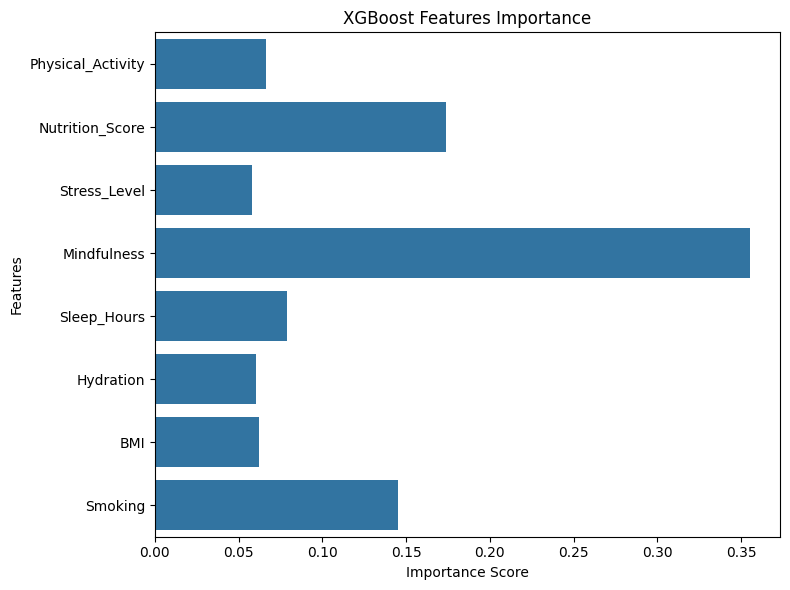

In [34]:
plt.figure(figsize=(8,6))
sns.barplot(x=importances, y=X.columns)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('XGBoost Features Importance')
plt.tight_layout()
plt.show()

In [35]:
print("=== XGB Performance ===")
print("Confusion Matrix :")
print(confusion_matrix(y_test, y_pred))


=== XGB Performance ===
Confusion Matrix :
[[ 701   68   56]
 [ 149 1903    0]
 [  27    0   96]]


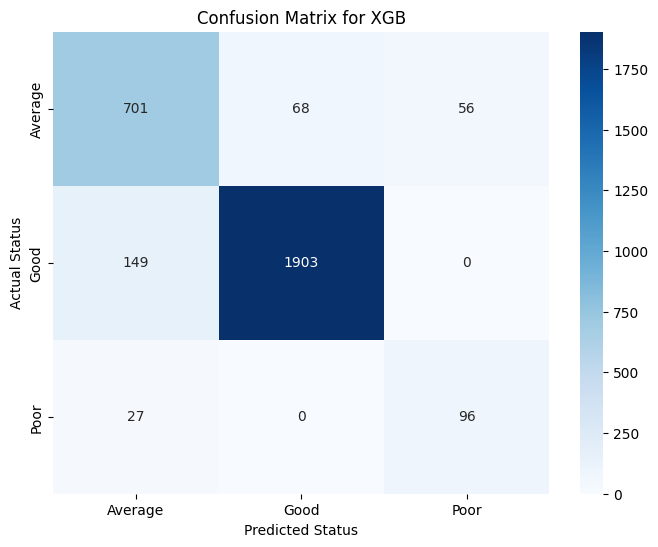

In [36]:
# --- Performance Measure ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=le.classes_,
    yticklabels=le.classes_,
)
plt.title('Confusion Matrix for XGB')
plt.ylabel('Actual Status')
plt.xlabel('Predicted Status')
plt.show()

<Figure size 1000x1000 with 0 Axes>

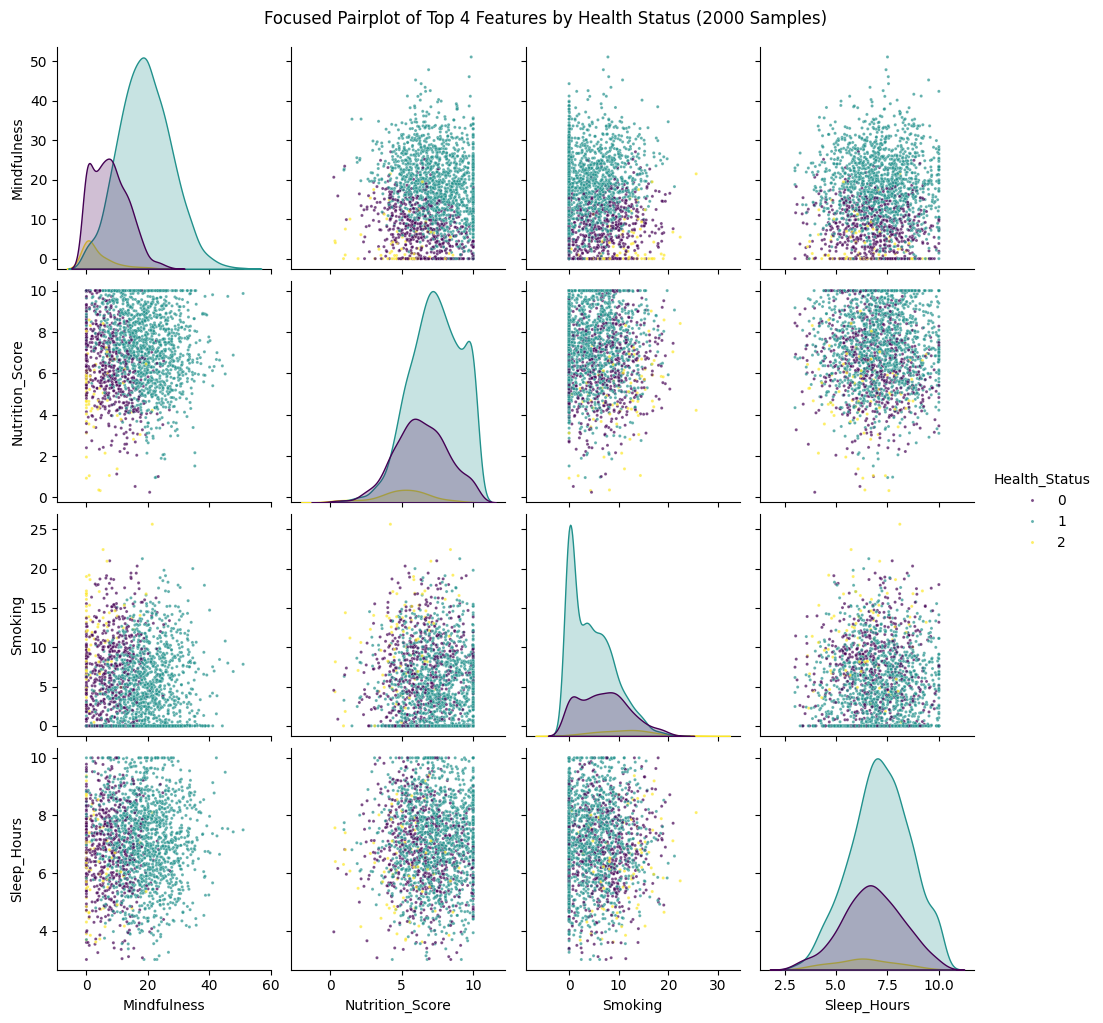

In [37]:
important_cols = [
    'Mindfulness',
    'Nutrition_Score',
    'Smoking',
    'Sleep_Hours',
    'Health_Status']                                            # ต้องรวม target variable สำหรับ hue
data_subset = data[important_cols]
data_sampled = data_subset.sample(n=2000, random_state=42)                                 # 4. สุ่มตัวอย่างข้อมูล (Sampling) และสร้าง Pairplot

# Generate the focused pairplot
plt.figure(figsize=(10, 10))
sns.pairplot(
data_sampled, hue='Health_Status', palette='viridis',
    plot_kws={'alpha': 0.7, 's': 5},                           # ลดขนาดจุด (s) เหลือ 5 เพื่อแก้ปัญหา overplotting
    diag_kind='kde'
    )
plt.suptitle('Focused Pairplot of Top 4 Features by Health Status (2000 Samples)', y=1.02)
plt.show()